In [11]:
#Initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Dataset load
df = pd.read_csv("C:/Users/jhair/Indicadores_municipales_sabana_DA.csv", encoding='latin-1')
df

,ent,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,...,pobreza_alim_10,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10
0,1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,...,11.805700,20.4,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628
1,1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,...,21.993299,39.9,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879
2,1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,...,19.266800,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781
3,1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,...,14.303200,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984
4,1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,...,15.085100,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,...,30.055300,51.8,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037
2452,32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,...,13.138800,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527
2453,32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,...,7.164800,15.7,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339
2454,32,Zacatecas,57,32057,Trancoso,20456,78.374962,14.607016,63.767946,13.750759,...,21.285900,36.2,36.4,30.037100,60.5,54.7,57.394501,0.380,0.483,0.365307


In [12]:
# Preparing Dataset
df = df[[col for col in df.columns if col != 'rankin_pe'] + ['rankin_pe']]

# Extracting Value to Predict
Tzucacab =  df.iloc[2389]
Tzucacab = Tzucacab.to_frame().T

# Reorder Dataset
df = df.drop(2389)
df = pd.concat([df, Tzucacab])
df

,ent,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,...,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10,rankin_pe
0,1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.98332,...,20.4,12.7,18.4746,43.4,33.7,41.900398,0.473,0.425,0.422628,2385
1,1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,...,39.9,29.0,30.980801,64.2,48.9,59.1758,0.379,0.533,0.343879,1915
2,1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,...,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781,1989
3,1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,...,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984,2196
4,1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,...,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083,2072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,...,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527,1748
2453,32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,...,15.7,20.7,12.1153,36.6,41.8,32.3027,0.528,0.498,0.436339,2298
2454,32,Zacatecas,57,32057,Trancoso,20456,78.374962,14.607016,63.767946,13.750759,...,36.2,36.4,30.0371,60.5,54.7,57.394501,0.38,0.483,0.365307,1445
2455,32,Zacatecas,58,32058,Santa María de la Paz,2772,62.204207,10.102023,52.102184,27.489635,...,37.6,44.8,26.998899,61.2,63.9,54.116299,0.431,0.5,0.385067,1752


In [13]:
# Preparing Dataset

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder for 'gender', oral', and 'tartar'
df['nom_ent'] = LabelEncoder().fit_transform(df['nom_ent'])
df['nom_mun'] = LabelEncoder().fit_transform(df['nom_mun'])
df['gdo_rezsoc00'] = LabelEncoder().fit_transform(df['gdo_rezsoc00'])
df['gdo_rezsoc05'] = LabelEncoder().fit_transform(df['gdo_rezsoc05'])
df['gdo_rezsoc10'] = LabelEncoder().fit_transform(df['gdo_rezsoc10'])

# Delate 'ent' Feature
df = df.drop(columns=['ent'])
df

,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10,rankin_pe
0,0,1,1001,35,794304,30.531104,2.264478,28.266627,27.98332,8.419106,...,20.4,12.7,18.4746,43.4,33.7,41.900398,0.473,0.425,0.422628,2385
1,0,2,1002,124,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,39.9,29.0,30.980801,64.2,48.9,59.1758,0.379,0.533,0.343879,1915
2,0,3,1003,235,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781,1989
3,0,4,1004,430,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984,2196
4,0,5,1005,755,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083,2072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,31,55,32055,2214,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527,1748
2453,31,56,32056,2266,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,15.7,20.7,12.1153,36.6,41.8,32.3027,0.528,0.498,0.436339,2298
2454,31,57,32057,2110,20456,78.374962,14.607016,63.767946,13.750759,4.440331,...,36.2,36.4,30.0371,60.5,54.7,57.394501,0.38,0.483,0.365307,1445
2455,31,58,32058,1692,2772,62.204207,10.102023,52.102184,27.489635,2.308246,...,37.6,44.8,26.998899,61.2,63.9,54.116299,0.431,0.5,0.385067,1752


In [14]:
# Mask for NaN Values
mask = df.isna()

# Print NaN Values
NaN = df[mask.any(axis=1)]
print(NaN)

      nom_ent  mun clave_mun  nom_mun pobtot_ajustada    pobreza  pobreza_e  \
137         4   58      7058     1012            4867   95.76583   55.47674   
442        11   77     12077      892           12312  72.296225  34.316054   
443        11   78     12078      382           15041  95.943368   82.60423   
444        11   79     12079      776           15561  93.262955   71.41128   
445        11   80     12080      790            5990  81.501586  45.568682   
446        11   81     12081      687           10443  80.837921  53.684387   
655        13  125     14125     1311           19006  70.095212  14.931804   
778        16  123     15123      857           18992  81.911982   44.66233   
779        16  124     15124     1343           69761  83.614996  47.324938   
780        16  125     15125     2095           12180  51.955093   7.500403   
1044       19   47     20047     1641             154  64.155932   8.144817   
1811       22    9     23009     2122           2359

In [15]:
# Set NaN Values to a Mean Value
df.fillna(df.mean(), inplace=True)

# Print Comparison
NaN = df[mask.any(axis=1)]
print(NaN)

      nom_ent  mun  clave_mun  nom_mun  pobtot_ajustada    pobreza  pobreza_e  \
137         4   58       7058     1012             4867  95.765830  55.476740   
442        11   77      12077      892            12312  72.296225  34.316054   
443        11   78      12078      382            15041  95.943368  82.604230   
444        11   79      12079      776            15561  93.262955  71.411280   
445        11   80      12080      790             5990  81.501586  45.568682   
446        11   81      12081      687            10443  80.837921  53.684387   
655        13  125      14125     1311            19006  70.095212  14.931804   
778        16  123      15123      857            18992  81.911982  44.662330   
779        16  124      15124     1343            69761  83.614996  47.324938   
780        16  125      15125     2095            12180  51.955093   7.500403   
1044       19   47      20047     1641              154  64.155932   8.144817   
1811       22    9      2300

In [16]:
# Features
x = df.drop(columns=['rankin_pe'])[:-1].values
x

array([[0.00000000e+00, 1.00000000e+00, 1.00100000e+03, ...,
        4.73000000e-01, 4.25000000e-01, 4.22628105e-01],
       [0.00000000e+00, 2.00000000e+00, 1.00200000e+03, ...,
        3.79000000e-01, 5.33000000e-01, 3.43879312e-01],
       [0.00000000e+00, 3.00000000e+00, 1.00300000e+03, ...,
        4.14000000e-01, 4.65000000e-01, 3.86780888e-01],
       ...,
       [3.10000000e+01, 5.60000000e+01, 3.20560000e+04, ...,
        5.28000000e-01, 4.98000000e-01, 4.36338514e-01],
       [3.10000000e+01, 5.70000000e+01, 3.20570000e+04, ...,
        3.80000000e-01, 4.83000000e-01, 3.65307093e-01],
       [3.10000000e+01, 5.80000000e+01, 3.20580000e+04, ...,
        4.31000000e-01, 5.00000000e-01, 3.85066509e-01]])

In [17]:
# Target Variables
y = df['rankin_pe'][:-1].values
y

array([2385, 1915, 1989, ..., 2298, 1445, 1752], dtype=int64)

In [18]:
# Preparing Features for Prediction
x_predict = df.iloc[-1, :-1].values
x_predict

array([ 3.00000000e+01,  9.80000000e+01,  3.10980000e+04,  2.14100000e+03,
        1.14640000e+04,  7.81112646e+01,  3.25112361e+01,  4.56000298e+01,
        1.90997139e+01,  9.60722007e-01,  1.82829946e+00,  3.58163650e+01,
        1.53496298e+01,  8.45581877e+01,  4.28461343e+01,  8.92262527e+01,
        2.31418808e+01,  9.72109790e+01,  6.57930406e+01,  7.90719866e+01,
        4.01865233e+01,  8.55000000e+02,  8.95500000e+03,  3.72700000e+03,
        5.22800000e+03,  2.19000000e+03,  1.10000000e+02,  2.10000000e+02,
        4.10600000e+03,  1.76000000e+03,  9.69400000e+03,  4.91200000e+03,
        1.02290000e+04,  2.65300000e+03,  1.11440000e+04,  7.54300000e+03,
        9.06500000e+03,  4.60700000e+03,  1.16600000e+03,  8.76000000e+02,
        3.10967517e+00,  3.72424602e+00,  2.66948509e+00,  2.51215005e+00,
        3.61972356e+00,  3.81291246e+00,  3.19801855e+00,  3.82480121e+00,
        3.13570833e+00,  4.18810368e+00,  2.99285579e+00,  3.63967943e+00,
        3.07221389e+00,  

In [19]:
# Calculate Euclidean Distance between Two Points
def euclidean_distance(point1, point2):
    squared_diff = (point1 - point2) ** 2
    return np.sqrt(np.sum(squared_diff))

# Create a KNN Regression model
def knn_regression(X_train, y_train, x_predict, k):
    distances = [euclidean_distance(x_predict, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_neighbors = [y_train[i] for i in nearest_indices]
    return np.mean(nearest_neighbors)

# Custom Train-Test Split
def train_test_split_custom(X, y, test_size, random_state):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

# Standardize Features
def standardize_features(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std_dev = np.std(X_train, axis=0)
    X_train = (X_train - mean) / std_dev
    X_test = (X_test - mean) / std_dev
    return X_train, X_test

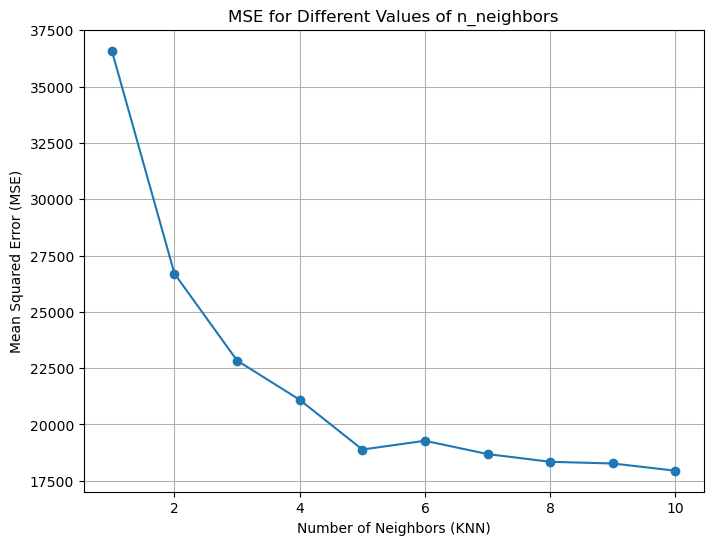

Mean Squared Error: 18887.455885947045


In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_custom(x, y, test_size=0.2, random_state=0)

# Standardize the features
X_train, X_test = standardize_features(X_train, X_test)

# Store MSE values
mse_values = []

# Try different values for k_neighbors
neighbor_values = range(1, 11)

for k in neighbor_values:
    y_pred = np.array([knn_regression(X_train, y_train, x, k) for x in X_test])
    
    # Calculate the MSE
    mse = np.mean((y_test - y_pred) ** 2)
    mse_values.append(mse)

# Plot the MSE values
plt.figure(figsize=(8, 6))
plt.plot(neighbor_values, mse_values, marker='o')
plt.title('MSE for Different Values of n_neighbors')
plt.xlabel('Number of Neighbors (KNN)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid()
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_custom(x, y, test_size=0.2, random_state=0)

# Standardize the features
X_train, X_test = standardize_features(X_train, X_test)

# Create a KNN Regressor model
def knn_predict(X_train, y_train, X_test, k):
    y_pred = [knn_regression(X_train, y_train, x, k) for x in X_test]
    return y_pred

# Make predictions
y_pred = knn_predict(X_train, y_train, X_test, 5)

# Evaluate the model
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")


In [21]:
# Prepare input for prediction
x_predict = x_predict.reshape(1, -1)
x_predict = (x_predict - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Make a prediction using the KNN model
predicted_ranking = knn_regression(X_train, y_train, x_predict, k=5)

# Display the predicted result
print("Tzucacab Predicted Extreme Poverty Ranking:", predicted_ranking)

Tzucacab Predicted Extreme Poverty Ranking: 2072.0


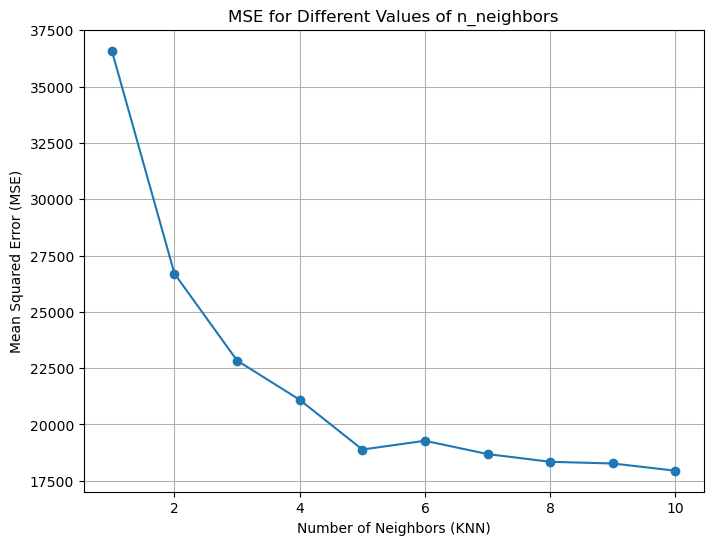

Mean Squared Error: 18887.455885947045


In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Store MSE values
mse_values = []

# Try different values for k_neighbors
neighbor_values = range(1, 11)

for k in neighbor_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn_model.predict(X_test)
    
    # Calculate the MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the MSE values
plt.figure(figsize=(8, 6))
plt.plot(neighbor_values, mse_values, marker='o')
plt.title('MSE for Different Values of n_neighbors')
plt.xlabel('Number of Neighbors (KNN)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid()
plt.show()

# Create a KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Define the predictor
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


In [23]:
# Prepare input for prediction
x_predict = x_predict.reshape(1, -1)
x_predict = scaler.transform(x_predict)

# Make a prediction using the KNN Regressor model
predicted_ranking = knn_model.predict(x_predict)

# Display the predicted result
print("Tzucacab Predicted Extreme Poverty Ranking:", predicted_ranking)

Tzucacab Predicted Extreme Poverty Ranking: [920.6]


In [24]:
TzucaRank = df.iloc[-1, -1]
print('Tzucacab Extreme Poverty Ranking: ', TzucaRank)

Tzucacab Extreme Poverty Ranking:  759
